# Região de Estabilidade do Método Trapezoidal Implícito (Crank-Nicolson)

Por via das dúvidas, vamos também encontrar a região de estabilidade para o método trapezoidal implícito. Como já vimos até agora, ele compartilha de muitas semelhanças com o método do Ponto Médio dentro da classe dos explícitos, basta verificar se para os para a classe dos implícitos essas semelhanças permanecem.
Sua fórmula foi dada pela equação:
$$
    u_{n+1} = u_{n} + \frac{\Delta t}{2} \ (k_{1} + k_{2})
$$

onde vamos substituir $k_{1}$ e $k_{2}$ que representam respectivamente as funções 
$$ 
    \begin{align*}
    k_{1} &= f(t_{n}, u_{n})  \\
    k_{2} &= f(t_{n+1}, u_{n+1})
    \end{align*}
$$

usando a equação de teste de Dahlquist:
$$
    \begin{align*}
    k_{1} &= \lambda u_{n} \\
    k_{2} &= \lambda u_{n+1}
    \end{align*}
$$

logo, voltando para a equação geral, obtemos:
$$
    \begin{align*}
        u_{n+1} = u_{n} + \frac{\Delta t}{2} (\lambda u_{n} + \lambda u_{n+1}) \\
        u_{n+1} = u_{n} + \frac{\Delta t \lambda \ u_{n}}{2}  +  \frac{\Delta t \lambda \ u_{n+1}}{2}
    \end{align*}
$$

como bem sabemos, substituímos $z = \Delta t\lambda$ e obtemos:
$$
    u_{n+1} = u_{n} + \frac{z\ u_{n}}{2}  +  \frac{z\ u_{n+1}}{2}
$$

separando os termos: 
$$
    \begin{align*}
    u_{n+1} - \frac{z\ u_{n+1}}{2} &= u_{n} + \frac{z\ u_{n}}{2}  \\
    u_{n+1} \left(1 - \frac{z}{2}\right) &= u_{n} \left(1 + \frac{z}{2} \right)  \\
    u_{n+1}  &= \frac{u_{n} \left(1 + \frac{z}{2} \right)}{ \left(1 - \frac{z}{2}\right) }
    \end{align*}
$$

assumindo $R(z)$, obtemos a região de estabilidade:
$$
    R(z)  = \frac{1 + \frac{z}{2} }{ 1 - \frac{z}{2}}
$$

o que é a mesma coisa que:
$$
    R(z)  = \frac{2+ z }{ 2 - z}
$$


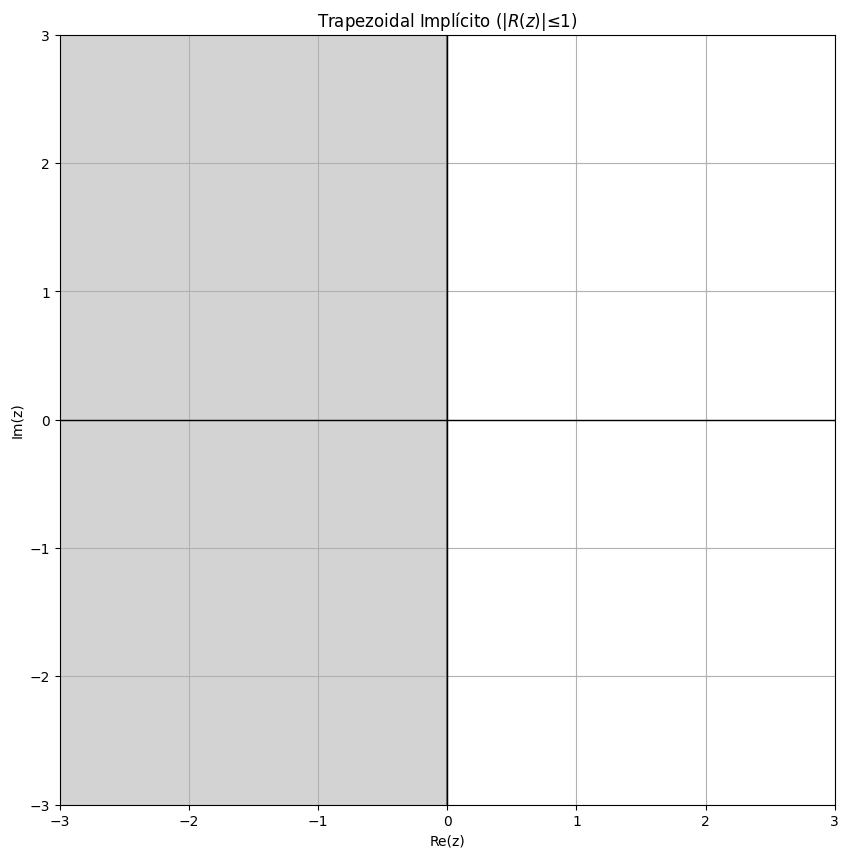

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

x = np.linspace(-3.0, 3, 400)
y = np.linspace(-3.0, 3.0, 400)
xx, yy = np.meshgrid(x, y)
z = xx + 1j*yy

def ImplicitTrapezoidal(z):
    return (2 + z) / (2 - z)


RE_IT = np.abs(ImplicitTrapezoidal(z))


plt.figure(figsize=(10,10))
plt.title('Trapezoidal Implícito ($|R(z)| ≤ 1$)')
plt.contourf(xx, yy, RE_IT, levels=[0,1], colors='lightgray')
plt.contour(xx, yy, RE_IT, levels=[1], colors="gray")
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.grid(True)
plt.axhline(0, color='black', lw=1, zorder=2) 
plt.axvline(0, color='black', lw=1, zorder=2)